In [8]:
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [12]:
df.sample(5)

,v1,v2
507,ham,You should know now. So how's anthony. Are you...
3794,ham,Also remember the beads don't come off. Ever.
2975,ham,I love u 2 my little pocy bell I am sorry but ...
186,ham,"Haha awesome, be there in a minute"
6,ham,Even my brother is not like to speak with me. ...


In [13]:
#rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])


In [25]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
#remove duplicste
df=df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

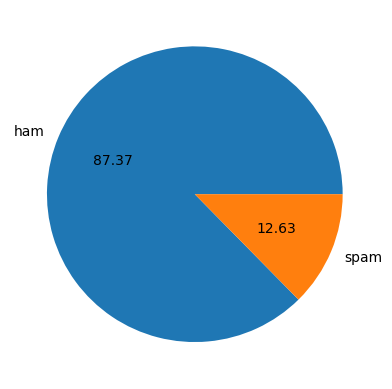

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tapas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Tapas\AppData\Local\Temp\ipykernel_1872\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [34]:
df

,target,text,num_words,num_wsentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57
5570,0,The guy did some bitching but I acted like i'd...,27,1,125


In [35]:
from nltk.tokenize import word_tokenize
df['num_words']=df['text'].apply(lambda x:len(word_tokenize(x)))
df


C:\Users\Tapas\AppData\Local\Temp\ipykernel_1872\1382952699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(word_tokenize(x)))


,target,text,num_words,num_wsentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57
5570,0,The guy did some bitching but I acted like i'd...,27,1,125


In [36]:
from nltk.tokenize import sent_tokenize
df['num_wsentences']=df['text'].apply(lambda x:len(sent_tokenize(x)))
df

C:\Users\Tapas\AppData\Local\Temp\ipykernel_1872\1388464165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_wsentences']=df['text'].apply(lambda x:len(sent_tokenize(x)))


,target,text,num_words,num_wsentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57
5570,0,The guy did some bitching but I acted like i'd...,27,1,125


In [37]:
df[['num_characters','num_words','num_wsentences']].describe()


,num_characters,num_words,num_wsentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#descive for ham massages
df[df['target']==0][['num_characters','num_words','num_wsentences']].describe()

,num_characters,num_words,num_wsentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#describe of spam massages
df[df['target']==1][['num_characters','num_words','num_wsentences']].describe()

,num_characters,num_words,num_wsentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

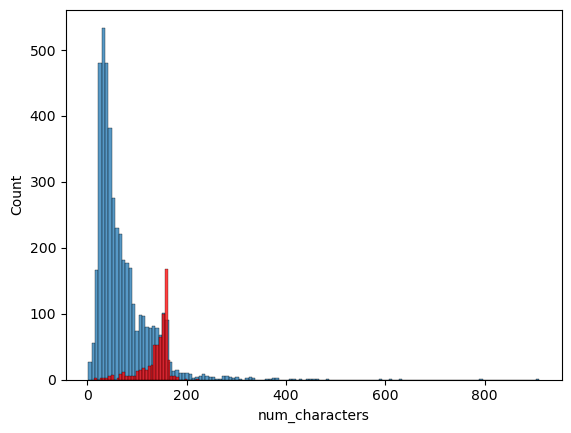

In [40]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color="red")

<Axes: xlabel='num_characters', ylabel='Count'>

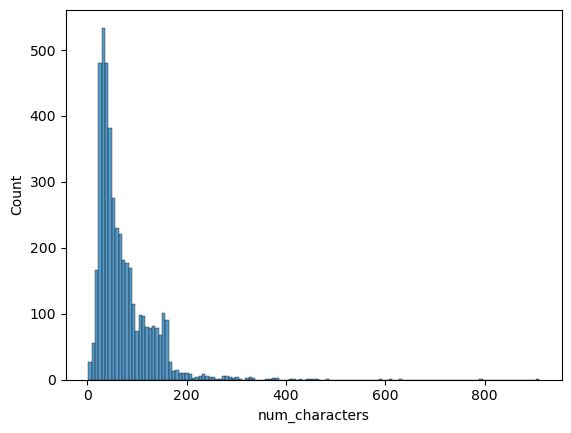

In [41]:
sns.histplot(df[df['target']==0]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

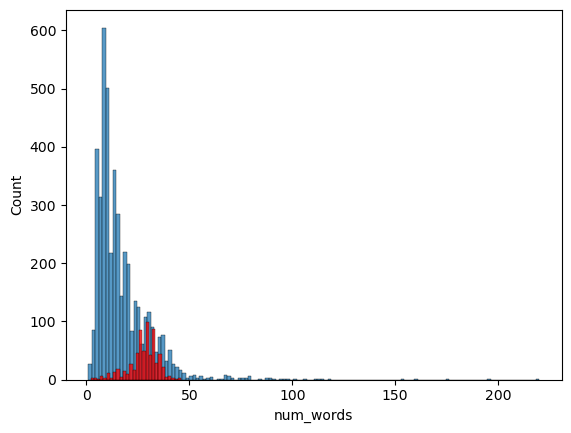

In [42]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="red")

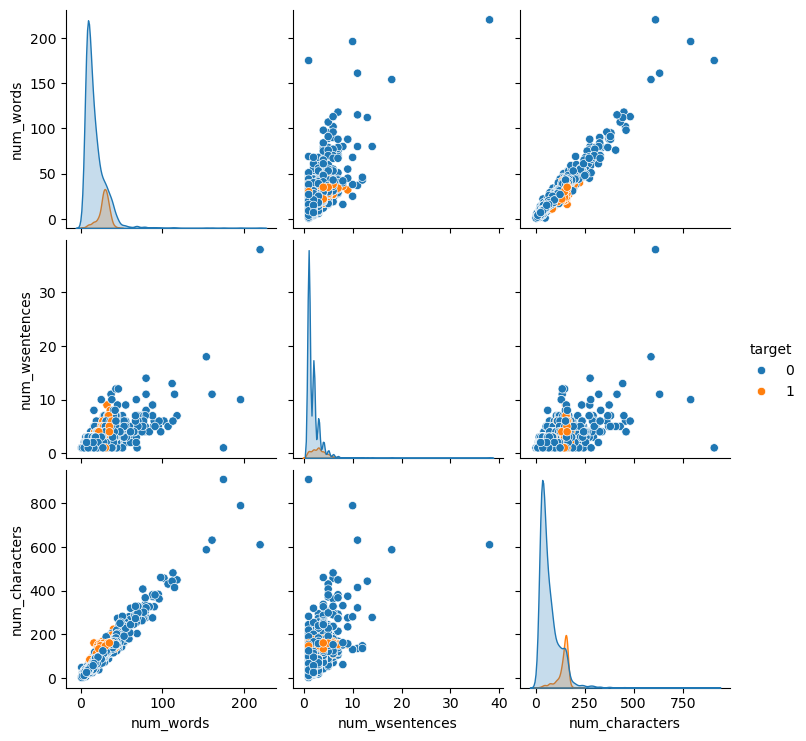

In [43]:
sns.pairplot(df,hue='target')

<Axes: >

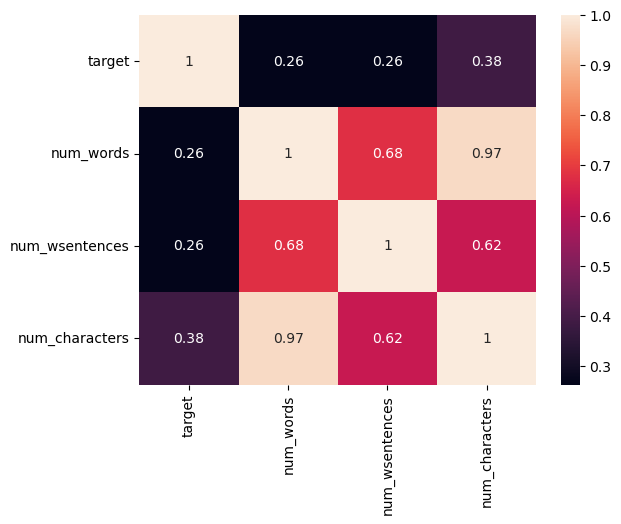

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [46]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    y = []
    for i in tokens:
        if i.isalnum(): 
            y.append(i)

    filtered_text = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            filtered_text.append(i)

    return filtered_text


AttributeError: 'str' object has no attribute 'isalum'

In [47]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # lowercase
    tokens = nltk.word_tokenize(text)  # tokenize

    y = []
    for i in tokens:
        if i.isalnum():  # keep alphanumeric only
            y.append(i)

    filtered_text = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            filtered_text.append(ps.stem(i))  # apply stemming

    return filtered_text



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tapas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tapas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [49]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [50]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [51]:
df['transformed_text']=df['text'].apply(transform_text)
# Join list of words into a single string
df['transformed_text'] = df['text'].apply(lambda x: " ".join(transform_text(x)))


C:\Users\Tapas\AppData\Local\Temp\ipykernel_1872\889729097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)
C:\Users\Tapas\AppData\Local\Temp\ipykernel_1872\889729097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(lambda x: " ".join(transform_text(x)))


In [106]:
df.head()transformed_text
0	0	Go until jurong point, crazy.. Available only ...	111	[Go, until, jurong, point, ,, crazy, .., Avail...	24	2	[go, jurong, point, crazi, avail, bugi, n, gre...
1	0	Ok lar... Joking wif u oni...	29	[Ok, lar, ..., Joking, wif, u, oni, ...]	8	2	[ok, lar, joke, wif, u, oni]
2	1	Free entry in 2 a wkly comp to win FA Cup fina...	155	[Free, entry, in, 2, a, wkly, comp, to, win, F...	37	2	[free, entri, 2, wkli, comp, win, fa, cup, fin...
3	0	U dun say so early hor... U c already then say...	49	[U, dun, say, so, early, hor, ..., U, c, alrea...	13	1	[u, dun, say, earli, hor, u, c, alreadi, say]
4	0	Nah I don't think he goes to usf, he lives aro...	61	[Nah, I, do, n't, think, he, goes, to, usf, ,,...	15	1	[nah, think, goe, usf, live, around, though]


,target,text,num_characters,tokens,num_words,num_wsentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1,"[nah, think, goe, usf, live, around, though]"


In [52]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


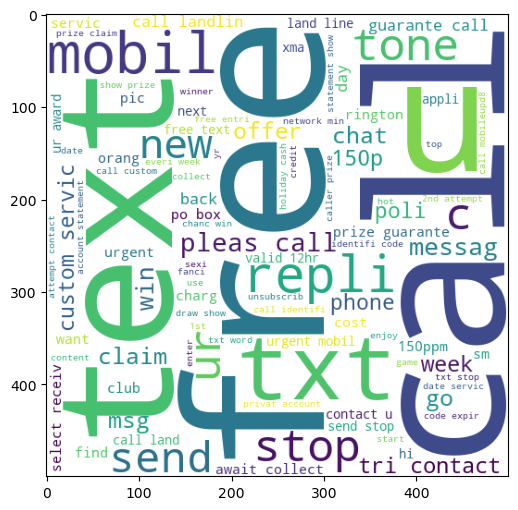

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

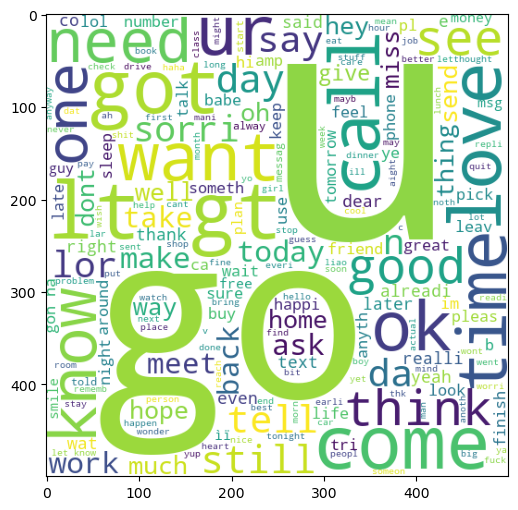

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_words,num_wsentences,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [58]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
      spam_corpus.append(word)
      

In [59]:
len(spam_corpus)

9939

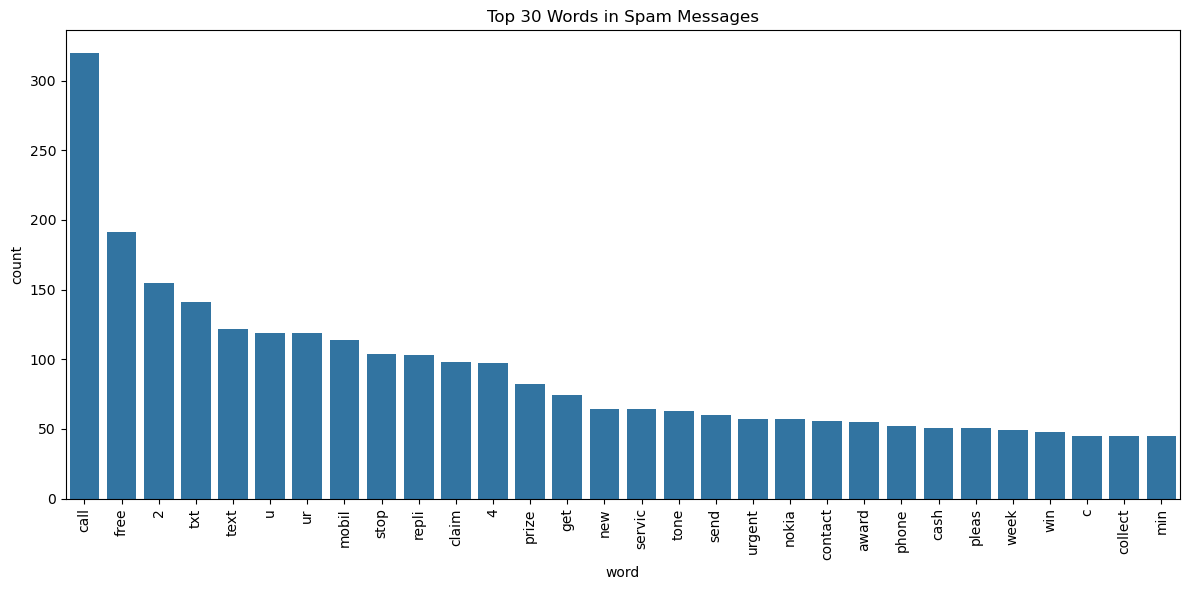

In [60]:

from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create Counter from the corpus
top_words = Counter(spam_corpus).most_common(30)

# Step 2: Convert to DataFrame
df_top = pd.DataFrame(top_words, columns=['word', 'count'])

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_top)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.tight_layout()
plt.show()



In [61]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
      ham_corpus.append(word)

In [62]:
len(ham_corpus)

35404

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

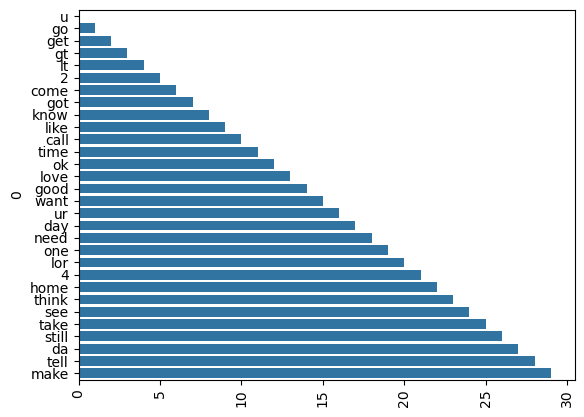

In [63]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],)
plt.xticks(rotation="vertical")


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['transformed_text']).toarray()

In [65]:
x


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
y=df['target'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:

from sklearn.model_selection import train_test_split


In [69]:
x_tarin,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [72]:
gnb.fit(x_tarin,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [73]:
mnb.fit(x_tarin,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [74]:
bnb.fit(x_tarin,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def tarin_classifier(clf,x_tarin,y_train,x_test,y_test):
    clf.fit(x_tarin,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy=precision_score(y_test,y_pred)

    return accuracy,accuracy

In [79]:
tarin_classifier(svc,x_tarin,y_train,x_test,y_test)

(0.7421875, 0.7421875)

In [80]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = tarin_classifier(clf,x_tarin,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7421875
Precision -  0.7421875
For  KN
Accuracy -  1.0
Precision -  1.0
For  NB
Accuracy -  0.8344370860927153
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9428571428571428
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9736842105263158
Precision -  0.9736842105263158
For  RF
Accuracy -  1.0
Precision -  1.0


C:\Users\Tapas\Downloads\a\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9464285714285714
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9159663865546218
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.9913793103448276
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9444444444444444
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9743589743589743
Precision -  0.9743589743589743


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [85]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,1.000000,1.000000
5,RF,1.000000,1.000000
8,ETC,0.991379,0.991379
10,xgb,0.974359,0.974359
4,LR,0.973684,0.973684
6,AdaBoost,0.946429,0.946429
9,GBDT,0.944444,0.944444
3,DT,0.942857,0.942857
7,BgC,0.915966,0.915966
2,NB,0.834437,0.834437


In [84]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
!pip install pandas

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip install scikit-learn
!pip install nltk
 
!pip install xgboost